In [87]:
import pandas as pd
import numpy as np

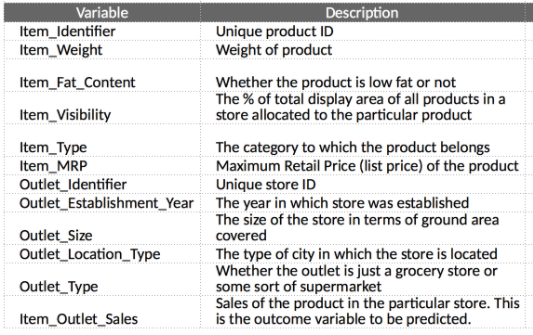

In [ ]:
df = pd.read_csv("sales_prediction.csv")

In [ ]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


### Prepare Training and Test data


Using 70% as Train data and 30% as test data, seed = 42 for reproducibility

In [ ]:
X = df.drop(columns = ["Item_Outlet_Sales"])
y = df["Item_Outlet_Sales"]
SEED = 42

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = SEED)
X_train.shape,X_test.shape

((5966, 11), (2557, 11))

#### Data Wrangling and EDA


In [ ]:
#make a copy of the data to do explorations
X_train_c = X_train.copy()

### Basic EDA


In [ ]:
X_train_c.info()

NameError: name 'X_train_c' is not defined

In [ ]:
X_train_c.isnull().sum()

Item_Identifier                 0
Item_Weight                  1023
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1690
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [ ]:
num_data = X_train_c.select_dtypes(exclude = "object")
num_data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
1921,7.72,0.147904,116.6466,1998
655,19.75,0.014301,103.0332,1997
2229,NaN,0.054221,129.1310,1985
2537,19.35,0.118342,222.6088,2002
3528,18.35,0.092150,184.8266,1987


In [ ]:
num_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4943.000000,5966.000000,5966.000000,5966.000000
mean,12.937193,0.065821,141.814242,1997.867248
std,4.630433,0.051093,62.627609,8.385023
min,4.555000,0.000000,31.290000,1985.000000
25%,8.895000,0.026982,94.144250,1987.000000
50%,12.650000,0.053923,143.879900,1999.000000
75%,17.000000,0.094350,186.621400,2004.000000
max,21.350000,0.328391,266.888400,2009.000000


In [ ]:
num_data.isnull().sum()

Item_Weight                  1023
Item_Visibility                 0
Item_MRP                        0
Outlet_Establishment_Year       0
dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
corr = num_data.corr()

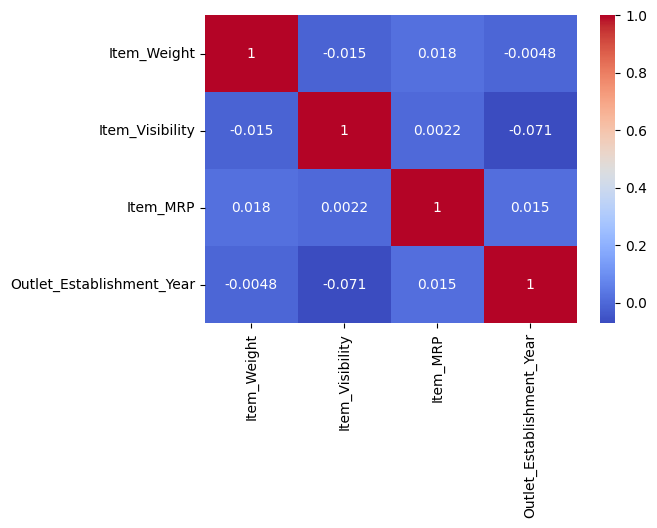

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
def visualize_numeric_features(data_frame,col_name):
  fig, ax = plt.subplots(1, 2, figsize=(12, 5))

  sns.histplot(data=data_frame, x=col_name, ax=ax[0]);
  sns.boxplot(data=data_frame, y=col_name, ax=ax[1]);

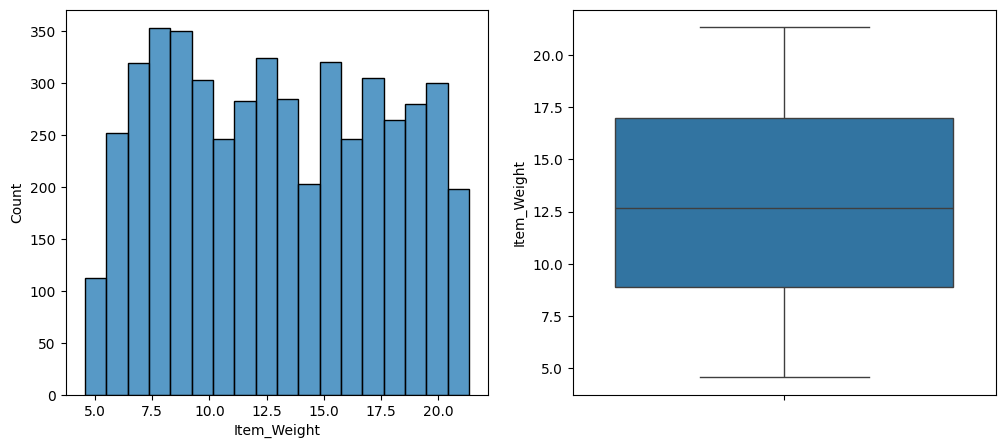

In [ ]:
visualize_numeric_features(X_train_c, "Item_Weight")

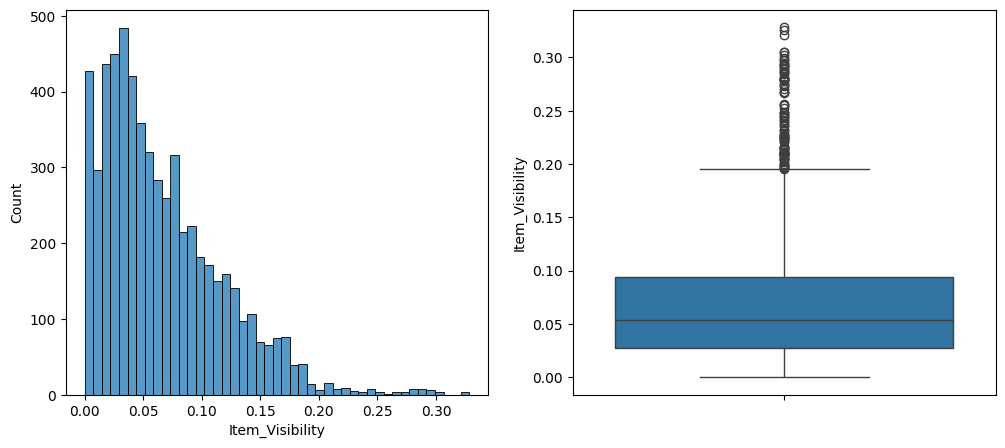

In [ ]:
visualize_numeric_features(X_train_c, "Item_Visibility")

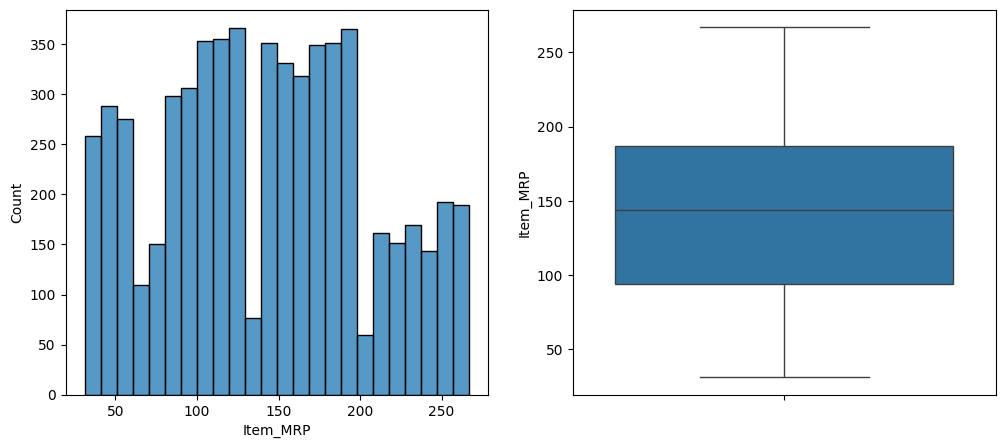

In [ ]:
visualize_numeric_features(X_train_c, "Item_MRP")

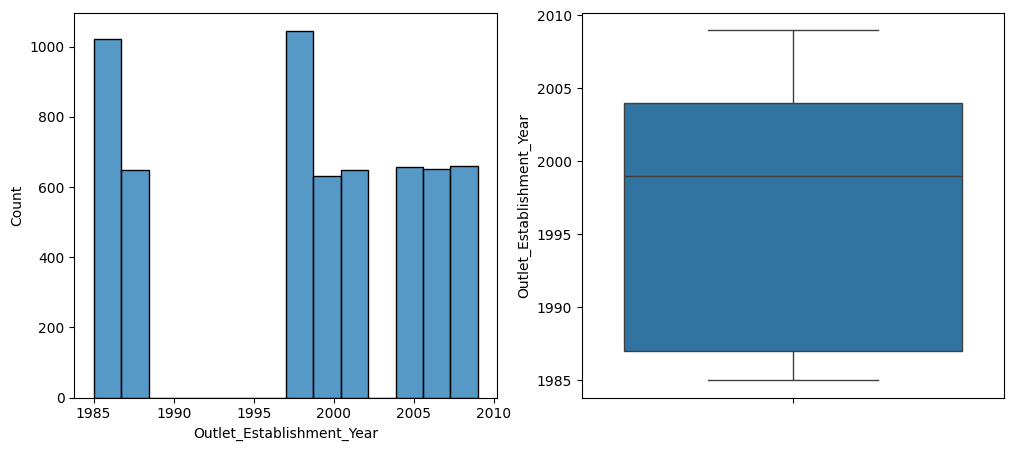

In [ ]:
visualize_numeric_features(X_train_c, "Outlet_Establishment_Year")

<Axes: xlabel='Outlet_Establishment_Year', ylabel='count'>

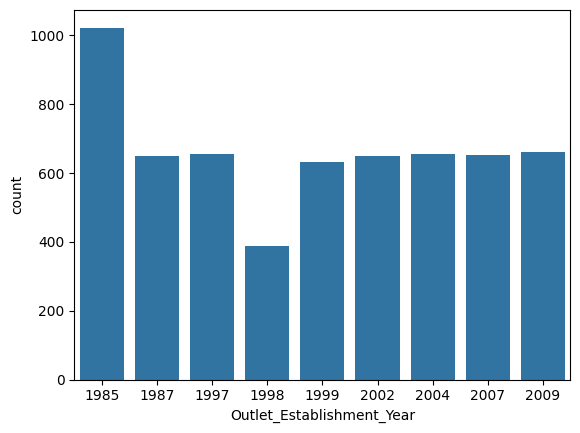

In [ ]:
sns.countplot(data = X_train_c, x = "Outlet_Establishment_Year")

In [ ]:
cat_features = X_train_c.select_dtypes(include = ["object"])
cat_features.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
655,NCJ42,Low Fat,Household,OUT046,Small,Tier 1,Supermarket Type1
2229,FDY47,Regular,Breads,OUT027,Medium,Tier 3,Supermarket Type3
2537,FDN45,Low Fat,Snack Foods,OUT045,NaN,Tier 2,Supermarket Type1
3528,FDY16,Regular,Frozen Foods,OUT013,High,Tier 3,Supermarket Type1


In [ ]:
cat_features.describe()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,5966,5966,5966,5966,4276,5966,5966
unique,1543,5,16,10,3,3,4
top,NCI54,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,9,3535,905,668,1960,2367,3893


In [ ]:
cat_features.isnull().sum()

Item_Identifier            0
Item_Fat_Content           0
Item_Type                  0
Outlet_Identifier          0
Outlet_Size             1690
Outlet_Location_Type       0
Outlet_Type                0
dtype: int64

In [ ]:
cat_features['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    3535
Regular    2027
LF          243
low fat      82
reg          79
Name: count, dtype: int64

In [ ]:
cat_features['Item_Identifier'].value_counts()

Item_Identifier
NCI54    9
FDF52    9
FDV60    8
FDT07    8
NCB18    8
        ..
FDT47    1
NCW42    1
DRH59    1
FDV14    1
FDG28    1
Name: count, Length: 1543, dtype: int64

In [ ]:
cat_features['Item_Type'].value_counts()

Item_Type
Fruits and Vegetables    905
Snack Foods              835
Household                648
Frozen Foods             591
Dairy                    474
Canned                   450
Baking Goods             438
Health and Hygiene       365
Soft Drinks              305
Meat                     275
Hard Drinks              162
Breads                   159
Others                   124
Starchy Foods            116
Breakfast                 80
Seafood                   39
Name: count, dtype: int64

In [ ]:
cat_features['Outlet_Identifier'].value_counts()

Outlet_Identifier
OUT027    668
OUT018    661
OUT046    656
OUT035    656
OUT017    652
OUT045    649
OUT013    649
OUT049    631
OUT010    389
OUT019    355
Name: count, dtype: int64

In [ ]:
cat_features['Outlet_Size'].value_counts()

Outlet_Size
Medium    1960
Small     1667
High       649
Name: count, dtype: int64

In [ ]:
cat_features['Outlet_Location_Type'].value_counts()

Outlet_Location_Type
Tier 3    2367
Tier 2    1957
Tier 1    1642
Name: count, dtype: int64

In [ ]:
cat_features['Outlet_Type'].value_counts()

Outlet_Type
Supermarket Type1    3893
Grocery Store         744
Supermarket Type3     668
Supermarket Type2     661
Name: count, dtype: int64

###Data Wrangling + Feature Engineering

####Step 1:Create High Level Item Types

In [ ]:
X_train_c['Item_Identifier'].apply(lambda x: x[:2])

1921    FD
655     NC
2229    FD
2537    FD
3528    FD
        ..
5734    FD
5191    FD
5390    NC
860     FD
7270    NC
Name: Item_Identifier, Length: 5966, dtype: object

In [ ]:
X_train_c['Item_Identifier'].apply(lambda x: x[:2]).value_counts()

Item_Identifier
FD    4269
NC    1137
DR     560
Name: count, dtype: int64

In [ ]:
X_train_c['Item_Identifier'].str[:2].value_counts()

Item_Identifier
FD    4269
NC    1137
DR     560
Name: count, dtype: int64

In [ ]:
# Step 1: Map Item IDs to Item Types
def create_item_type(data_frame):
  data_frame['Item_Type']= data_frame['Item_Identifier'].str[:2]
  data_frame['Item_Type']= data_frame['Item_Type'].map({
      'FD' :'Food',
      'NC' :'Non_Consumables',
      'DR' :'Drink'
   })
  return data_frame

In [ ]:
X_train_c =create_item_type(X_train_c)
X_train_c.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,7.72,Regular,0.147904,Food,116.6466,OUT010,1998,NaN,Tier 3,Grocery Store
655,NCJ42,19.75,Low Fat,0.014301,Non_Consumables,103.0332,OUT046,1997,Small,Tier 1,Supermarket Type1
2229,FDY47,NaN,Regular,0.054221,Food,129.1310,OUT027,1985,Medium,Tier 3,Supermarket Type3
2537,FDN45,19.35,Low Fat,0.118342,Food,222.6088,OUT045,2002,NaN,Tier 2,Supermarket Type1
3528,FDY16,18.35,Regular,0.092150,Food,184.8266,OUT013,1987,High,Tier 3,Supermarket Type1


####Step 2:Fill in missing values for Item_Weight

In [ ]:
X_train_c.isnull().sum()

Item_Identifier                 0
Item_Weight                  1023
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1690
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [ ]:
X_train_c[['Item_Identifier','Item_Weight']].drop_duplicates().sort_values(by=['Item_Identifier'])

,Item_Identifier,Item_Weight
1245,DRA12,11.60
4900,DRA24,19.35
6057,DRA59,NaN
1876,DRA59,8.27
3733,DRB01,NaN
...,...,...
411,NCZ42,10.50
2084,NCZ53,NaN
6879,NCZ53,9.60
7926,NCZ54,14.65


In [ ]:
X_train_c[['Item_Type','Item_Weight']].drop_duplicates().sort_values(by=['Item_Type'])

,Item_Type,Item_Weight
2796,Drink,5.730
998,Drink,20.250
670,Drink,8.395
6091,Drink,13.500
3438,Drink,13.850
...,...,...
6624,Non_Consumables,12.600
6191,Non_Consumables,8.880
1911,Non_Consumables,19.850
135,Non_Consumables,7.235


In [ ]:
X_train_c.pivot_table(values='Item_Weight',index='Item_Identifier').reset_index()

,Item_Identifier,Item_Weight
0,DRA12,11.600
1,DRA24,19.350
2,DRA59,8.270
3,DRB01,7.390
4,DRB13,6.115
...,...,...
1517,NCZ30,6.590
1518,NCZ41,19.850
1519,NCZ42,10.500
1520,NCZ53,9.600


In [ ]:
#Step 2:Fill in missing values for Item_Weight
#Logic
#1st step:Use mapping of item ID - weight and fill in missing values \
#2nd step:If completely new item
#i.e item ID in test \live data use item type -median(weight) and fill in missing values

ITEM_ID_WEIGHT_PIVOT =X_train_c.pivot_table(values='Item_Weight',index='Item_Identifier').reset_index()
ITEM_ID_WEIGHT_MAPPING =dict(zip(ITEM_ID_WEIGHT_PIVOT['Item_Identifier'],ITEM_ID_WEIGHT_PIVOT['Item_Weight']))
list(ITEM_ID_WEIGHT_MAPPING.items())[:10]

[('DRA12', 11.6),
 ('DRA24', 19.35),
 ('DRA59', 8.27),
 ('DRB01', 7.39),
 ('DRB13', 6.115),
 ('DRB24', 8.785),
 ('DRB25', 12.300000000000002),
 ('DRB48', 16.75),
 ('DRC01', 5.92),
 ('DRC12', 17.85)]

In [ ]:
ITEM_TYPE_WEIGHT_PIVOT =X_train_c.pivot_table(values ='Item_Weight', index='Item_Type',
                                              aggfunc='median').reset_index()
ITEM_TYPE_WEIGHT_MAPPING =dict(zip(ITEM_TYPE_WEIGHT_PIVOT['Item_Type'], ITEM_TYPE_WEIGHT_PIVOT['Item_Weight'] ))
ITEM_TYPE_WEIGHT_MAPPING.items()

dict_items([('Drink', 11.8), ('Food', 12.8), ('Non_Consumables', 13.05)])

In [ ]:
# def impute_item_weight(data_frame):
#   #1st logic item id -weight
#   data_frame.loc[:,'Item_Weight'] = data_frame.loc[:,'Item_Weight'].fillna(data_frame.loc[:,'Item_Identifier'].map(ITEM_ID_WEIGHT_MAPPING))
#   #2nd logic item type-weight if any still missing
#   data_frame.loc[:,'Item_Weight']= data_frame.loc[:,'Item_Weight'].fillna(data_frame.loc[:,'Item_Identifier'].map(ITEM_TYPE_WEIGHT_MAPPING))

#   return data_frame

def impute_item_weight(data_frame):
  # 1st logic item id - weight
  data_frame.loc[:,'Item_Weight'] =data_frame.loc[:,'Item_Weight'].fillna(data_frame.loc[:,'Item_Identifier'].map(ITEM_ID_WEIGHT_MAPPING))
  # 2nd logic item type - weight if any still missing
  data_frame.loc[:,'Item_Weight'] = data_frame.loc[:,'Item_Weight'].fillna(data_frame.loc[:,'Item_Type'].map(ITEM_TYPE_WEIGHT_MAPPING))

  return data_frame

In [ ]:
X_train_c = impute_item_weight(X_train_c)

In [ ]:
X_train_c.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1690
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

####Step 3:Fill in missing values for Outlet_Size


In [ ]:
X_train_c.groupby(by=['Outlet_Type','Outlet_Size']).size()

Outlet_Type        Outlet_Size
Grocery Store      Small           355
Supermarket Type1  High            649
                   Medium          631
                   Small          1312
Supermarket Type2  Medium          661
Supermarket Type3  Medium          668
dtype: int64

In [ ]:
def impute_outlet_size(data_frame):
    # Fill missing values in 'Outlet Size' column with 'Small' for rows where 'Outlet Type' is 'Grocery Store'
    data_frame.loc[data_frame['Outlet_Type'] == 'Grocery Store', 'Outlet_Size'] = data_frame.loc[data_frame['Outlet_Type'] == 'Grocery Store', 'Outlet_Size'].fillna('Small')

    # Fill missing values in 'Outlet Size' column with 'Small' for rows where 'Outlet Type' is 'Supermarket Type1'
    data_frame.loc[data_frame['Outlet_Type'] == 'Supermarket Type1', 'Outlet_Size'] = data_frame.loc[data_frame['Outlet_Type'] == 'Supermarket Type1', 'Outlet_Size'].fillna('Small')

    # Fill missing values in 'Outlet Size' column with 'Medium' for rows where 'Outlet Type' is 'Supermarket Type2' or 'Supermarket Type3'
    data_frame.loc[data_frame['Outlet_Type'].isin(['Supermarket Type2', 'Supermarket Type3']), 'Outlet_Size'] = data_frame.loc[data_frame['Outlet_Type'].isin(['Supermarket Type2', 'Supermarket Type3']), 'Outlet_Size'].fillna('Medium')

    return data_frame

In [ ]:
X_train_c = impute_outlet_size(X_train_c)

In [ ]:
X_train_c.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

####Step 4:Standarize Item_Fat_content categories

In [ ]:
X_train_c['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    3535
Regular    2027
LF          243
low fat      82
reg          79
Name: count, dtype: int64

In [ ]:
# Step 4: Make Item Fat Content categories consistent

def standardize_item_fat_content(data_frame):
  data_frame['Item_Fat_Content'] = data_frame['Item_Fat_Content' ].replace({
                                                                'Low Fat': 'Low_Fat',
                                                                'LF' : 'Low_Fat',
                                                                'reg' : 'Regular',
                                                                'low fat' : 'Low_Fat'
                                                              })
  return data_frame

In [ ]:
X_train_c = standardize_item_fat_content(X_train_c)
X_train_c['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low_Fat    3860
Regular    2106
Name: count, dtype: int64

####Step 5: Correct Item fat content for non-consumables

In [ ]:
X_train_c.groupby(by=['Item_Type','Item_Fat_Content']).size()

Item_Type        Item_Fat_Content
Drink            Low_Fat              517
                 Regular               43
Food             Low_Fat             2206
                 Regular             2063
Non_Consumables  Low_Fat             1137
dtype: int64

In [ ]:
X_train_c.loc[X_train_c['Item_Type']=='Non_Consumables', 'Item_Fat_Content']

655     Low_Fat
4423    Low_Fat
907     Low_Fat
7021    Low_Fat
6074    Low_Fat
         ...   
8322    Low_Fat
466     Low_Fat
6265    Low_Fat
5390    Low_Fat
7270    Low_Fat
Name: Item_Fat_Content, Length: 1137, dtype: object

In [ ]:
# Step 5: Correct Item fat content for non-consumables

def correct_item_fat_content(data_frame):
    data_frame.loc[data_frame['Item_Type'] == 'Non_Consumables', 'Item_Fat_Content'] = 'Non_Edible'
    return data_frame

In [ ]:
X_train_c = correct_item_fat_content(X_train_c)
X_train_c.groupby(by=['Item_Type', 'Item_Fat_Content']).size()

Item_Type        Item_Fat_Content
Drink            Low_Fat              517
                 Regular               43
Food             Low_Fat             2206
                 Regular             2063
Non_Consumables  Non_Edible          1137
dtype: int64

In [ ]:
X_train_c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5966 entries, 1921 to 7270
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5966 non-null   object 
 1   Item_Weight                5966 non-null   float64
 2   Item_Fat_Content           5966 non-null   object 
 3   Item_Visibility            5966 non-null   float64
 4   Item_Type                  5966 non-null   object 
 5   Item_MRP                   5966 non-null   float64
 6   Outlet_Identifier          5966 non-null   object 
 7   Outlet_Establishment_Year  5966 non-null   int64  
 8   Outlet_Size                5966 non-null   object 
 9   Outlet_Location_Type       5966 non-null   object 
 10  Outlet_Type                5966 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 559.3+ KB


###Prepare Datasets for ML

In [ ]:
def prepare_dataset(data_frame):

    # Step 1: Create Item Type
    data_frame = create_item_type(data_frame)

    # Step 2: Fill in missing values for Item_Weight
    data_frame = impute_item_weight(data_frame)

    # Step 3: Impute missing values for Outlet_Size
    data_frame = impute_outlet_size(data_frame)

    # Step 4: Make Item Fat Content categories consistent
    data_frame = standardize_item_fat_content(data_frame)

    # Step 5: Correct Item fat content for non-consumables
    data_frame = correct_item_fat_content(data_frame)

    return data_frame

In [ ]:
X_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1023
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1690
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [ ]:
X_train = prepare_dataset(X_train)
X_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [ ]:
X_test.isnull().sum()

Item_Identifier                0
Item_Weight                  440
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                  720
Outlet_Location_Type           0
Outlet_Type                    0
dtype: int64

In [ ]:
X_test =prepare_dataset(X_test)
X_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

###Handling Categorical Data

In [ ]:
cat_feats =X_train.select_dtypes(include=['object'])
cat_feats.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,Regular,Food,OUT010,Small,Tier 3,Grocery Store
655,NCJ42,Non_Edible,Non_Consumables,OUT046,Small,Tier 1,Supermarket Type1
2229,FDY47,Regular,Food,OUT027,Medium,Tier 3,Supermarket Type3
2537,FDN45,Low_Fat,Food,OUT045,Small,Tier 2,Supermarket Type1
3528,FDY16,Regular,Food,OUT013,High,Tier 3,Supermarket Type1


In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(cat_feats)

OneHotEncoder(handle_unknown='ignore')

In [ ]:
ohe_feature_names = ohe.get_feature_names_out(input_features=cat_feats.columns)
ohe_feature_names

array(['Item_Identifier_DRA12', 'Item_Identifier_DRA24',
       'Item_Identifier_DRA59', ..., 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3'],
      dtype=object)

In [ ]:
num_feats_train = X_train.select_dtypes(exclude=['object']).reset_index(drop=True)
num_feats_train.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,7.72,0.147904,116.6466,1998
1,19.75,0.014301,103.0332,1997
2,8.60,0.054221,129.1310,1985
3,19.35,0.118342,222.6088,2002
4,18.35,0.092150,184.8266,1987


In [ ]:
cat_feats_train = X_train.select_dtypes(include=['object'])
X_train_cat_ohe = pd.DataFrame(ohe.transform(cat_feats_train).toarray(), columns=ohe_feature_names)
X_train_cat_ohe.head()

,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,Item_Identifier_DRB25,Item_Identifier_DRB48,Item_Identifier_DRC01,Item_Identifier_DRC12,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
X_train_final = pd.concat([num_feats_train, X_train_cat_ohe], axis=1)
X_train_final.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,7.72,0.147904,116.6466,1998,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,19.75,0.014301,103.0332,1997,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,8.60,0.054221,129.1310,1985,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,19.35,0.118342,222.6088,2002,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,18.35,0.092150,184.8266,1987,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
final_columns = X_train_final.columns.values
final_columns

array(['Item_Weight', 'Item_Visibility', 'Item_MRP', ...,
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'], dtype=object)

In [ ]:
num_feats_test = X_test.select_dtypes(exclude=['object']).reset_index(drop=True)
cat_feats_test = X_test.select_dtypes(include=['object'])
X_test_cat_ohe = pd.DataFrame(ohe.transform(cat_feats_test).toarray(), columns=ohe_feature_names)
X_test_final = pd.concat([num_feats_test, X_test_cat_ohe], axis=1)
X_test_final = X_test_final[final_columns]

X_test_final.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,14.300,0.026300,79.4302,1987,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,7.930,0.071136,42.7086,1997,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,14.500,0.041313,42.0454,1999,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,13.000,0.044767,173.7054,1985,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,10.195,0.012456,197.5110,2004,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


#Modeling

<Axes: xlabel='Item_Outlet_Sales', ylabel='Count'>

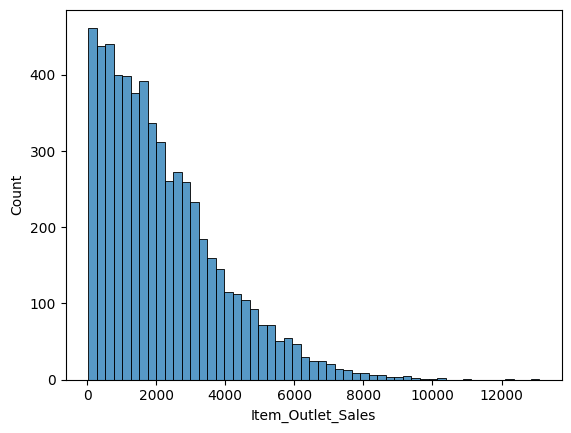

In [ ]:
sns.histplot(y_train)

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
import xgboost as xgb
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_validate
import numpy as np

In [96]:
def train_and_eval_model(model, X_train, y_train, cv=5):
    cv_results = cross_validate(model, X_train, y_train, cv=cv, scoring=("r2", "neg_root_mean_squared_error"))
    r2_scores = cv_results['test_r2']
    r2_mean = np.mean(r2_scores)
    r2_std = np.std(r2_scores)
    rmse_scores = cv_results['test_neg_root_mean_squared_error']
    rmse_scores = [-1 * score for score in rmse_scores]
    rmse_mean = np.mean(rmse_scores)
    rmse_std = np.std(rmse_scores)

    # Append values to lists
    r2_means.append(r2_mean)
    r2_stds.append(r2_std)
    rmse_means.append(rmse_mean)
    rmse_stds.append(rmse_std)

    # Print results
    print('Model:', model)
    print('R2 CV scores:', r2_scores)
    print('R2 CV scores mean / stdev:', r2_mean, '/', r2_std)
    print('RMSE CV scores:', rmse_scores)
    print('RMSE CV scores mean / stdev:', rmse_mean, '/', rmse_std)

In [97]:
rf=RandomForestRegressor(random_state=SEED)
train_and_eval_model(model=rf,X_train=X_train_final,y_train=y_train)

Model: RandomForestRegressor(random_state=42)
R2 CV scores: [0.57060768 0.5268083  0.54281021 0.55421798 0.52017727]
R2 CV scores mean / stdev: 0.5429242875459817 / 0.01828158855152387
RMSE CV scores: [1104.0666302663794, 1168.4808032468748, 1180.6054342042014, 1154.4334423647522, 1202.0836655939197]
RMSE CV scores mean / stdev: 1161.9339951352256 / 32.888811410647826


In [98]:
gb=GradientBoostingRegressor(random_state=SEED)
train_and_eval_model(model=gb,X_train=X_train_final,y_train=y_train)

Model: GradientBoostingRegressor(random_state=42)
R2 CV scores: [0.6065274  0.59366925 0.57356358 0.60924345 0.55022613]
R2 CV scores mean / stdev: 0.5866459646024772 / 0.022148578096336337
RMSE CV scores: [1056.8793046591481, 1082.786581771003, 1140.2068860094903, 1080.838373141466, 1163.8349579736446]
RMSE CV scores mean / stdev: 1104.9092207109504 / 40.23395923794627


In [99]:
hgb=HistGradientBoostingRegressor(random_state=SEED)
train_and_eval_model(model=hgb,X_train=X_train_final,y_train=y_train)

Model: HistGradientBoostingRegressor(random_state=42)
R2 CV scores: [0.58793884 0.54297938 0.54501125 0.585042   0.54567103]
R2 CV scores mean / stdev: 0.5613284973532673 / 0.0205841656268121
RMSE CV scores: [1081.5559461370956, 1148.3411312834949, 1177.760118083806, 1113.806369963145, 1169.713511250089]
RMSE CV scores mean / stdev: 1138.235415343526 / 35.957026103361265


In [100]:
xgr=xgb.XGBRegressor(objective='reg:squarederror',random_state=SEED)
train_and_eval_model(model=xgr,X_train=X_train_final,y_train=y_train)

Model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)
R2 CV scores: [0.57730972 0.55914207 0.54421335 0.58393553 0.52431207]
R2 CV scores mean / stdev: 0.5577825481764618 / 0.021778582707669483
RMSE CV scores: [1095.416494682338, 1127.8526118741622, 1178.792371186943, 1115.290340217991, 1196.893076803

In [101]:
lgbr=LGBMRegressor(random_state=SEED)
train_and_eval_model(model=lgbr,X_train=X_train_final,y_train=y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000478 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 802
[LightGBM] [Info] Number of data points in the train set: 4772, number of used features: 30
[LightGBM] [Info] Start training from score 2221.272740
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000387 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 807
[LightGBM] [Info] Number of data points in the train set: 4773, number of used features: 30
[LightGBM] [Info] Start training from score 2213.452868
[LightGBM] [Warning] Found

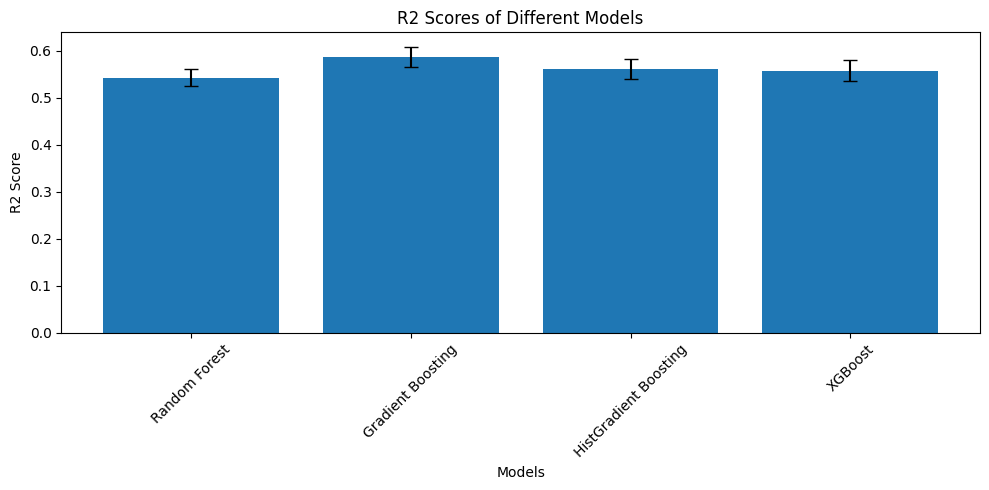

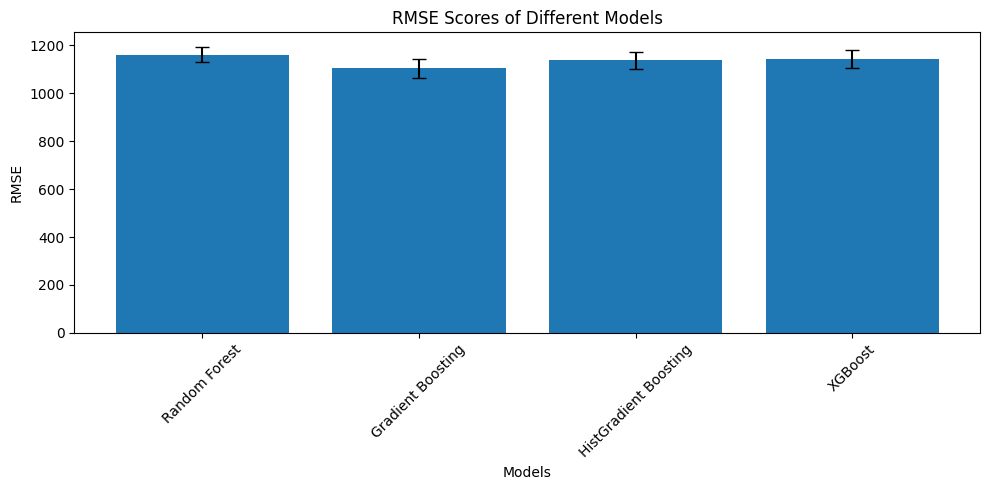

In [103]:
import matplotlib.pyplot as plt

# Define models and their names
models = [rf, gb, hgb, xgr]
model_names = ['Random Forest', 'Gradient Boosting', 'HistGradient Boosting', 'XGBoost']

# Initialize lists to store evaluation metrics
r2_means = []
r2_stds = []
rmse_means = []
rmse_stds = []

# Calculate mean and standard deviation for each metric
for model in models:
    cv_results = cross_validate(model, X_train_final, y_train, cv=5, scoring=("r2", "neg_root_mean_squared_error"))
    r2_scores = cv_results['test_r2']
    rmse_scores = [-1 * score for score in cv_results['test_neg_root_mean_squared_error']]
    r2_means.append(np.mean(r2_scores))
    r2_stds.append(np.std(r2_scores))
    rmse_means.append(np.mean(rmse_scores))
    rmse_stds.append(np.std(rmse_scores))

# Plot R2 scores
plt.figure(figsize=(10, 5))
plt.bar(model_names, r2_means, yerr=r2_stds, capsize=5)
plt.title('R2 Scores of Different Models')
plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot RMSE scores
plt.figure(figsize=(10, 5))
plt.bar(model_names, rmse_means, yerr=rmse_stds, capsize=5)
plt.title('RMSE Scores of Different Models')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#Handling categorical Data

##Expt 2:All categorical columns - Native Handling

In [ ]:
X_train_copy = X_train.copy().drop(columns= "Item_Identifier")
cat_cols = X_train_copy.select_dtypes(include=['object']).columns.tolist()
num_cols = cal_cols = X_train_copy.select_dtypes(exclude=['object']).columns.tolist()

cat_cols, num_cols

(['Item_Fat_Content',
  'Item_Type',
  'Outlet_Identifier',
  'Outlet_Size',
  'Outlet_Location_Type',
  'Outlet_Type'],
 ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year'])

In [ ]:
X_train_copy[cat_cols] = X_train_copy[cat_cols].astype('category')
n_categorical_features = len(cat_cols)
n_numercal_features = len(num_cols)

X_train_copy = X_train_copy[cat_cols+num_cols]
X_train_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5966 entries, 1921 to 7270
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_Fat_Content           5966 non-null   category
 1   Item_Type                  5966 non-null   category
 2   Outlet_Identifier          5966 non-null   category
 3   Outlet_Size                5966 non-null   category
 4   Outlet_Location_Type       5966 non-null   category
 5   Outlet_Type                5966 non-null   category
 6   Item_Weight                5966 non-null   float64 
 7   Item_Visibility            5966 non-null   float64 
 8   Item_MRP                   5966 non-null   float64 
 9   Outlet_Establishment_Year  5966 non-null   int64   
dtypes: category(6), float64(3), int64(1)
memory usage: 269.1 KB


In [ ]:
categorical_mask=[True]*n_categorical_features+[False]*n_numercal_features
categorical_mask

[True, True, True, True, True, True, False, False, False, False]

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector

categorical_mask=[True]*n_categorical_features+[False]*n_numercal_features

ordinal_encoder = make_column_transformer(
    (
        OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=np.nan),
        make_column_selector(dtype_include="category"),
    ),
    remainder='passthrough'
)

hgb = make_pipeline(
    ordinal_encoder,
    HistGradientBoostingRegressor(
        random_state=42,categorical_features=categorical_mask
    ),
)
train_and_eval_model(model=hgb,X_train=X_train_copy,y_train=y_train)

Model: Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=nan),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7c09f31a1390>)])),
                ('histgradientboostingregressor',
                 HistGradientBoostingRegressor(categorical_features=[True, True,
                                                                     True, True,
                                                                     True, True,
                                                                     False,
                                                                     False,
                                                         

In [ ]:
lgbr=LGBMRegressor(random_state=SEED)
train_and_eval_model(model=lgbr,X_train=X_train_copy,y_train=y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000175 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 782
[LightGBM] [Info] Number of data points in the train set: 4772, number of used features: 10
[LightGBM] [Info] Start training from score 2221.272740
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000174 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 787
[LightGBM] [Info] Number of data points in the train set: 4773, number of used features: 10
[LightGBM] [Info] Start training from score 2213.452868
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000205 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

#Handling categorical Data

##Expt 3:No item identifier - One hot encoded

In [ ]:
X_train.select_dtypes(include=['object']).drop(columns=['Item_Identifier']).head()

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,Regular,Food,OUT010,Small,Tier 3,Grocery Store
655,Non_Edible,Non_Consumables,OUT046,Small,Tier 1,Supermarket Type1
2229,Regular,Food,OUT027,Medium,Tier 3,Supermarket Type3
2537,Low_Fat,Food,OUT045,Small,Tier 2,Supermarket Type1
3528,Regular,Food,OUT013,High,Tier 3,Supermarket Type1


In [ ]:
cat_feats = X_train.select_dtypes(include=["object"]).drop(columns="Item_Identifier")
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(cat_feats)
ohe_feature_names = ohe.get_feature_names_out(input_features=cat_feats.columns)

In [ ]:
num_feats_train = X_train.select_dtypes(exclude=['object']).reset_index(drop=True)
cat_feats_train = X_train.select_dtypes(include=["object"]).drop(columns="Item_Identifier")
X_train_cat_ohe = pd.DataFrame(ohe.transform(cat_feats_train).toarray(), columns=ohe_feature_names)
X_train_final = pd.concat([num_feats_train, X_train_cat_ohe], axis=1)

X_train_final.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low_Fat,Item_Fat_Content_Non_Edible,Item_Fat_Content_Regular,Item_Type_Drink,Item_Type_Food,Item_Type_Non_Consumables,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,7.72,0.147904,116.6466,1998,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,19.75,0.014301,103.0332,1997,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,8.60,0.054221,129.1310,1985,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,19.35,0.118342,222.6088,2002,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,18.35,0.092150,184.8266,1987,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
X_train_final.shape

(5966, 30)

In [ ]:
gb=GradientBoostingRegressor(random_state=SEED)
train_and_eval_model(model=gb,X_train=X_train_final,y_train=y_train)

Model: GradientBoostingRegressor(random_state=42)
R2 CV scores: [0.6027587  0.58477918 0.57733175 0.61716814 0.5638745 ]
R2 CV scores mean / stdev: 0.5891824563495011 / 0.01880337124010431
RMSE CV scores: [1061.9286612011877, 1094.5675808387577, 1135.1580306171122, 1069.8223327510743, 1146.040671315857]
RMSE CV scores mean / stdev: 1101.5034553447979 / 33.864902948875674


In [ ]:
hgb=HistGradientBoostingRegressor(random_state=SEED)
train_and_eval_model(model=hgb,X_train=X_train_final,y_train=y_train)

Model: HistGradientBoostingRegressor(random_state=42)
R2 CV scores: [0.58793884 0.54297938 0.54501125 0.585042   0.54567103]
R2 CV scores mean / stdev: 0.5613284973532673 / 0.0205841656268121
RMSE CV scores: [1081.5559461370956, 1148.3411312834949, 1177.760118083806, 1113.806369963145, 1169.713511250089]
RMSE CV scores mean / stdev: 1138.235415343526 / 35.957026103361265


In [ ]:
xgr=xgb.XGBRegressor(objective='reg:squarederror',random_state=SEED)
train_and_eval_model(model=xgr,X_train=X_train_final,y_train=y_train)

Model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)
R2 CV scores: [0.52348154 0.47860959 0.45772502 0.49196841 0.46576096]
R2 CV scores mean / stdev: 0.48350910211416415 / 0.023122182697374725
RMSE CV scores: [1163.075778281383, 1226.547983760074, 1285.7789125594438, 1232.403674476319, 1268.41713837

In [ ]:
lgbr=LGBMRegressor(random_state=SEED)
train_and_eval_model(model=lgbr,X_train=X_train_final,y_train=y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000495 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 802
[LightGBM] [Info] Number of data points in the train set: 4772, number of used features: 30
[LightGBM] [Info] Start training from score 2221.272740
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000455 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 807
[LightGBM] [Info] Number of data points in the train set: 4773, number of used features: 30
[LightGBM] [Info] Start training from score 2213.452868
[LightGBM] [Warning] Found

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000507 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 802
[LightGBM] [Info] Number of data points in the train set: 4772, number of used features: 30
[LightGBM] [Info] Start training from score 2221.272740
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000471 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 807
[LightGBM] [Info] Number of data points in the train set: 4773, number of used features: 30
[LightGBM] [Info] Start training from score 2213.452868
[LightGBM] [Warning] Found

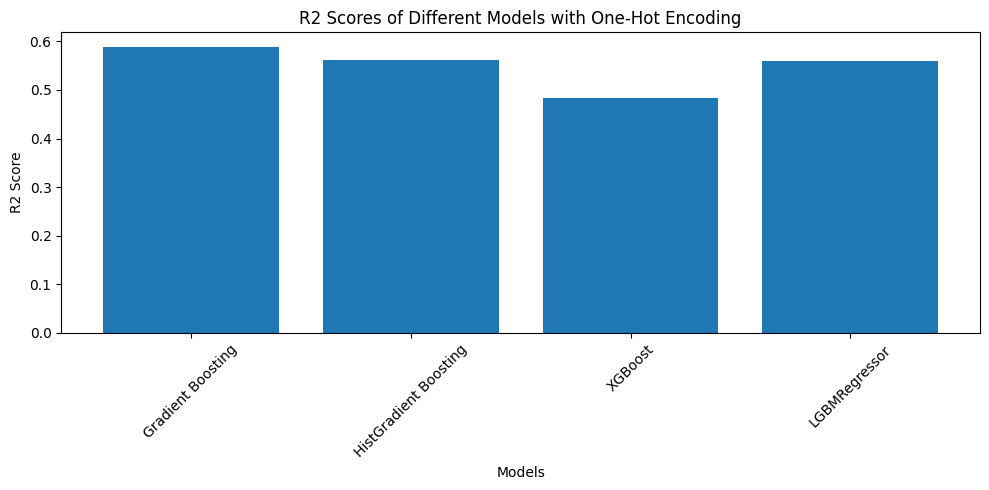

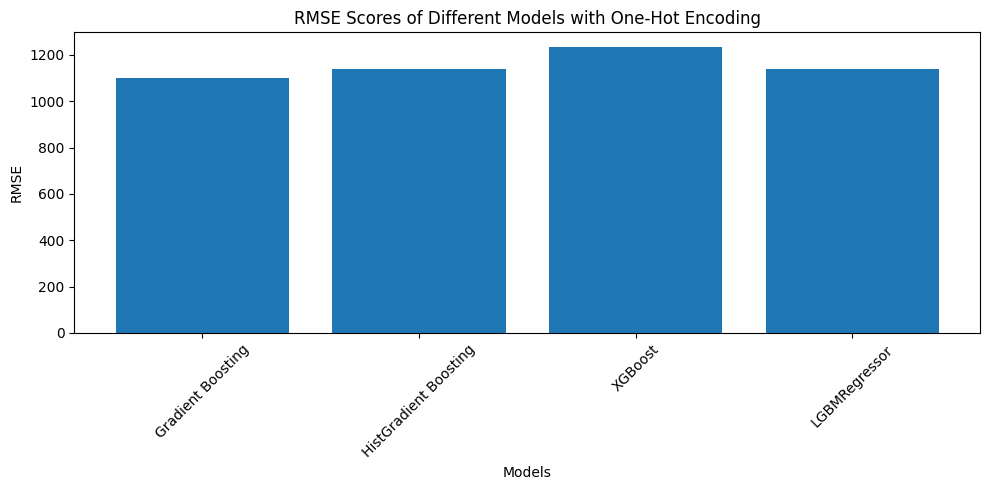

In [105]:
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor, HistGradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Function to train and evaluate the model
def train_and_eval_model(model, X_train, y_train, cv=5):
    cv_results = cross_validate(model, X_train, y_train, cv=cv, scoring=("r2", "neg_root_mean_squared_error"))
    r2_scores = cv_results['test_r2']
    rmse_scores = [-1 * score for score in cv_results['test_neg_root_mean_squared_error']]
    r2_mean = np.mean(r2_scores)
    rmse_mean = np.mean(rmse_scores)
    return r2_mean, rmse_mean

# Perform one-hot encoding on categorical features
cat_feats = X_train.select_dtypes(include=["object"]).drop(columns="Item_Identifier")
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(cat_feats)
ohe_feature_names = ohe.get_feature_names_out(input_features=cat_feats.columns)
num_feats_train = X_train.select_dtypes(exclude=['object']).reset_index(drop=True)
cat_feats_train = X_train.select_dtypes(include=["object"]).drop(columns="Item_Identifier")
X_train_cat_ohe = pd.DataFrame(ohe.transform(cat_feats_train).toarray(), columns=ohe_feature_names)
X_train_final = pd.concat([num_feats_train, X_train_cat_ohe], axis=1)

# Define models
gb = GradientBoostingRegressor(random_state=SEED)
hgb = HistGradientBoostingRegressor(random_state=SEED)
xgr = XGBRegressor(objective='reg:squarederror', random_state=SEED)
lgbr = LGBMRegressor(random_state=SEED)

# Train and evaluate models
gb_r2, gb_rmse = train_and_eval_model(model=gb, X_train=X_train_final, y_train=y_train)
hgb_r2, hgb_rmse = train_and_eval_model(model=hgb, X_train=X_train_final, y_train=y_train)
xgr_r2, xgr_rmse = train_and_eval_model(model=xgr, X_train=X_train_final, y_train=y_train)
lgbr_r2, lgbr_rmse = train_and_eval_model(model=lgbr, X_train=X_train_final, y_train=y_train)

# Plot relevant graphs
models = ['Gradient Boosting', 'HistGradient Boosting', 'XGBoost', 'LGBMRegressor']
r2_scores = [gb_r2, hgb_r2, xgr_r2, lgbr_r2]
rmse_scores = [gb_rmse, hgb_rmse, xgr_rmse, lgbr_rmse]

# Plot R2 scores
plt.figure(figsize=(10, 5))
plt.bar(models, r2_scores)
plt.title('R2 Scores of Different Models with One-Hot Encoding')
plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot RMSE scores
plt.figure(figsize=(10, 5))
plt.bar(models, rmse_scores)
plt.title('RMSE Scores of Different Models with One-Hot Encoding')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#Handling categorical Data

##Expt 4:Item identifier - feature hashed,rest categorical - one hot encoded


In [ ]:
from sklearn.feature_extraction import FeatureHasher

hash_vector_size = 50
fh = FeatureHasher(n_features=hash_vector_size, input_type='string')
hashed_df = pd.DataFrame(fh.transform([X_train['Item_Identifier']]).toarray(),
                          columns=['H'+str(i) for i in range(hash_vector_size)])

hashed_df.head()

,H0,H1,H2,H3,H4,H5,H6,H7,H8,H9,...,H40,H41,H42,H43,H44,H45,H46,H47,H48,H49
0,-5.0,37.0,18.0,8.0,-58.0,-21.0,-19.0,20.0,-8.0,-26.0,...,21.0,31.0,17.0,3.0,-16.0,0.0,7.0,20.0,-22.0,9.0


In [ ]:
cat_feats = X_train.select_dtypes(include=['object']).drop(columns=['Item_Identifier'])
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(cat_feats)
ohe_feature_names= ohe.get_feature_names_out(input_features=cat_feats.columns)

In [ ]:
num_feats_train = X_train.select_dtypes(exclude= ['object']).reset_index(drop=True)
cat_feats_train = X_train.select_dtypes(include=["object"]).drop(columns="Item_Identifier")
X_train_cat_ohe = pd.DataFrame(ohe.transform(cat_feats_train).toarray(), columns=ohe_feature_names)
X_train_final = pd.concat([num_feats_train,hashed_df,X_train_cat_ohe], axis=1)
X_train_final.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,H0,H1,H2,H3,H4,H5,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,7.72,0.147904,116.6466,1998,-5.0,37.0,18.0,8.0,-58.0,-21.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,19.75,0.014301,103.0332,1997,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,8.60,0.054221,129.1310,1985,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,19.35,0.118342,222.6088,2002,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,18.35,0.092150,184.8266,1987,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
X_train_final.shape

(5966, 80)

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
imputer = SimpleImputer(strategy='mean')

# Create a pipeline with the imputer and the GradientBoostingRegressor
gb_pipeline = make_pipeline(imputer, GradientBoostingRegressor(random_state=SEED))
train_and_eval_model(model=gb_pipeline,X_train=X_train_final,y_train=y_train)

Model: Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(random_state=42))])
R2 CV scores: [0.6027587  0.58473524 0.57747091 0.61718192 0.56444891]
R2 CV scores mean / stdev: 0.5893191364036203 / 0.018638012911050956
RMSE CV scores: [1061.9286612011877, 1094.6255025606079, 1134.9711449450122, 1069.8030804579678, 1145.2857145565897]
RMSE CV scores mean / stdev: 1101.322820744273 / 33.63091928135932


In [ ]:
xgr=xgb.XGBRegressor(objective='reg:squarederror',random_state=SEED)
train_and_eval_model(model=xgr,X_train=X_train_final,y_train=y_train)

Model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)
R2 CV scores: [0.52348154 0.47860959 0.45772502 0.49196841 0.46859932]
R2 CV scores mean / stdev: 0.4840767756427444 / 0.02271065917199704
RMSE CV scores: [1163.075778281383, 1226.547983760074, 1285.7789125594438, 1232.403674476319, 1265.0431535601

In [ ]:
X_test.shape

(2557, 11)

In [ ]:
hashed_test_df = pd.DataFrame(fh.transform([X_test['Item_Identifier']]).toarray(),
                              columns=['H'+str(i) for i in range(hash_vector_size)])

num_feats_test = X_test.select_dtypes(exclude=['object']).reset_index(drop=True)
cat_feats_test = X_test. select_dtypes(include=['object']).drop(columns=['Item_Identifier'])
X_test_cat_ohe = pd.DataFrame(ohe.transform(cat_feats_test).toarray(),columns=ohe_feature_names)
X_test_final = pd.concat([num_feats_test, hashed_test_df, X_test_cat_ohe], axis=1)
X_test_final.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,H0,H1,H2,H3,H4,H5,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,14.300,0.026300,79.4302,1987,-14.0,17.0,5.0,2.0,-19.0,-6.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,7.930,0.071136,42.7086,1997,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,14.500,0.041313,42.0454,1999,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,13.000,0.044767,173.7054,1985,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,10.195,0.012456,197.5110,2004,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
X_test_final.shape

(2557, 80)

In [ ]:
xgr=xgb.XGBRegressor(objective='reg:squarederror',random_state=SEED)
xgr.fit(X_train_final,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred=xgr.predict(X_test_final)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
print('R2 Score:', r2_score(y_test, y_pred))
print('RMSE Score:',mean_squared_error(y_test, y_pred, squared=False))

R2 Score: 0.5273566392962166
RMSE Score: 1150.5959299778758


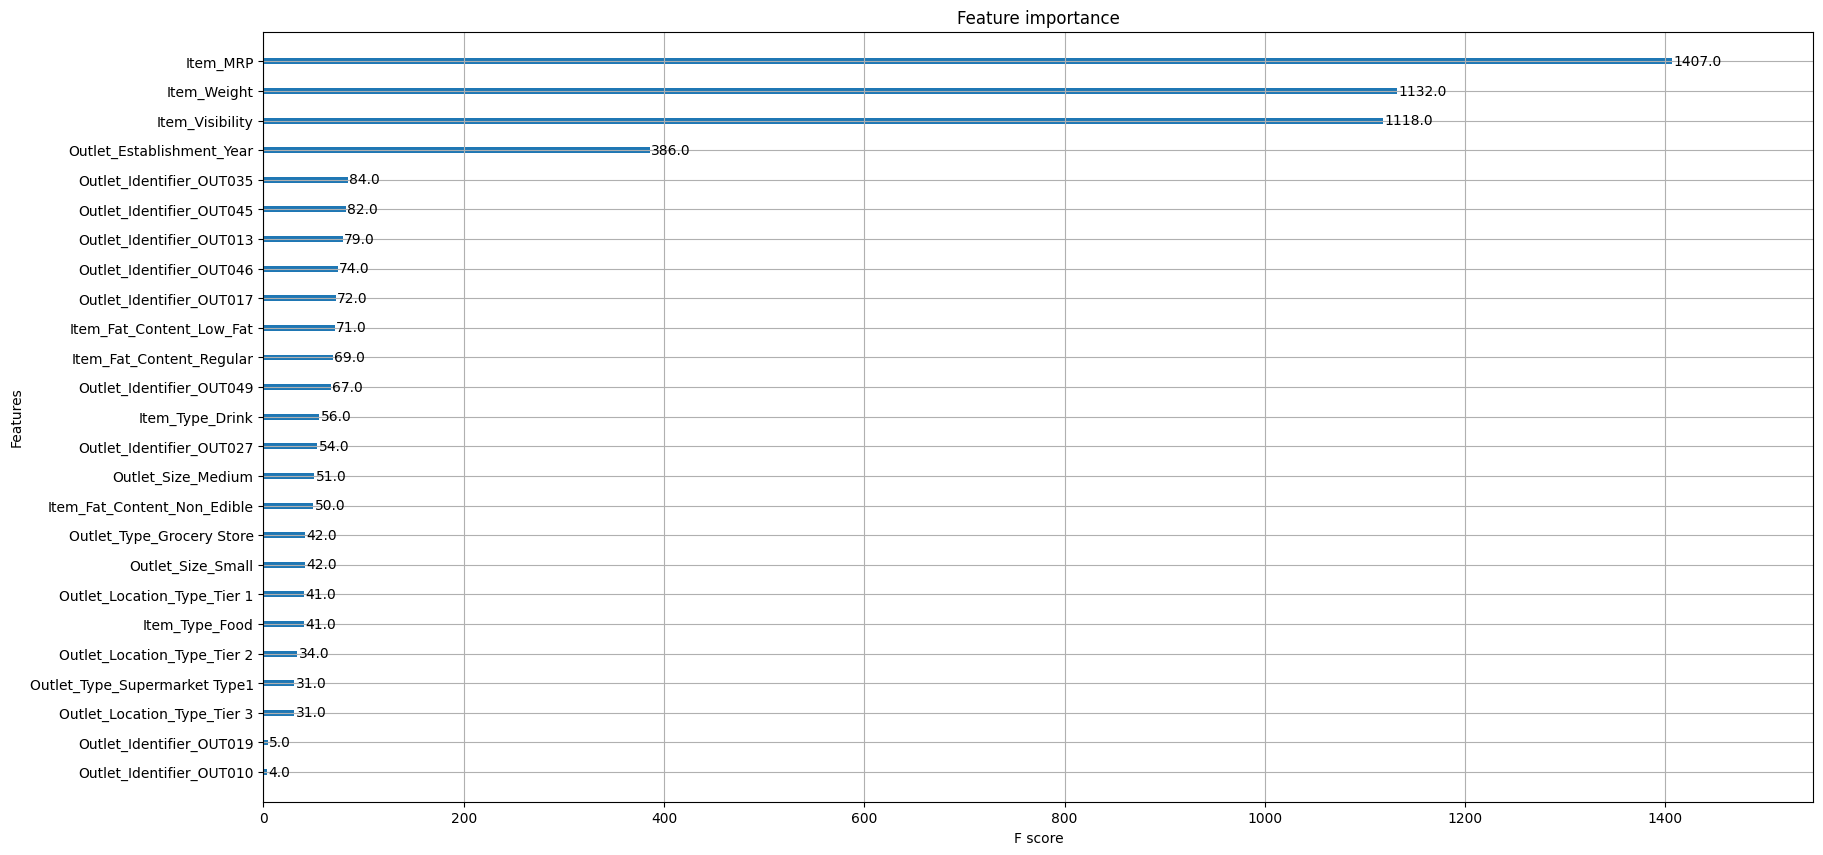

In [ ]:
from xgboost import plot_importance

fig, ax = plt.subplots(1,1, figsize=(20, 10))
plot_importance(xgr, ax=ax);